In [1]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("bfi.csv")

In [3]:
df.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3',
       'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
# Dropping unnecessary columns
df.drop(["A0", "gender", "education","age"],axis=1,inplace=True)

In [5]:
# Dropping missing values rows
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
A1    2436 non-null float64
A2    2436 non-null float64
A3    2436 non-null float64
A4    2436 non-null float64
A5    2436 non-null float64
C1    2436 non-null float64
C2    2436 non-null float64
C3    2436 non-null float64
C4    2436 non-null float64
C5    2436 non-null float64
E1    2436 non-null float64
E2    2436 non-null float64
E3    2436 non-null float64
E4    2436 non-null float64
E5    2436 non-null float64
N1    2436 non-null float64
N2    2436 non-null float64
N3    2436 non-null float64
N4    2436 non-null float64
N5    2436 non-null float64
O1    2436 non-null float64
O2    2436 non-null int64
O3    2436 non-null float64
O4    2436 non-null float64
O5    2436 non-null float64
dtypes: float64(24), int64(1)
memory usage: 494.8 KB


****-------------------------------------------------------------------------------------------------*****
Test d'adéquation 
--
-->évaluer la «factorabilité» de notre jeu de données
- Test de Bartlett
- Test de Kaiser-Meyer-Olkin

In [7]:
#Test de Bartlett : vérifie si les variables observées s'inter-corrèlent ou non en utilisant la matrice de corrélation observée par rapport à la matrice d'identité
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869236, 0.0)

--> la valeur p était égale à 0. Le test était statistiquement significatif, indiquant que la matrice de corrélation observée n'est pas une matrice d'identité.

In [8]:
#Test de Kaiser-Meyer-Olkin : Les valeurs de KMO inférieures à 0,6 sont considérées comme inadéquates.
#KMO estime la proportion de variance parmi toutes les variables observées.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [9]:
kmo_model

0.848539722194922

-->Le KMO global pour nos données est de 0,84, ce qui est excellent. Cette valeur indique que vous pouvez poursuivre votre analyse factorielle planifiée.

***--------------------------------------------------------***
Choisir le nombre de facteurs
--

In [10]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df)
# Check Eigenvalues : Calculez les valeurs propres à partir de la matrice de corrélation de facteurs.
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

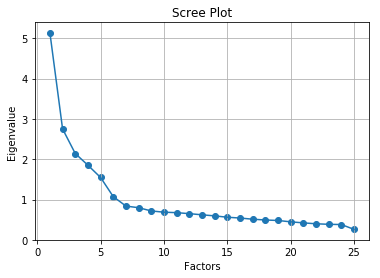

In [11]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

-->vous pouvez voir que pour 6 facteurs, les valeurs propres sont supérieures à un. Cela signifie que nous devons choisir seulement 6 facteurs 

**--------------------------------------------------------**
Analyse factorielle performante
--

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 6 , rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [16]:
from pandas import Series, DataFrame
Index = ['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5']
DF_obj = DataFrame(fa.loadings_, index = Index, columns=['fact 1', 'fact 2', 'fact 3', 'fact 4', 'fact 5', 'fact 6'])
DF_obj

,fact 1,fact 2,fact 3,fact 4,fact 5,fact 6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


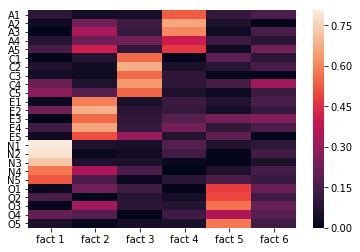

In [25]:
import seaborn as sb
sb.heatmap(DF_obj.abs(),xticklabels=DF_obj.columns.values, yticklabels=DF_obj.index.values)

-->
- Le facteur 2 a des charges de facteur élevées pour E1, E2, E3, E4 et E5 (extraversion)
- Le facteur 1 a des charges de facteur élevées pour N1, N2, N3, N4 et N5 (Neuroticism)
- Le facteur 3 a des charges de facteur élevées pour C1, C2, C3, C4 et C5 (Conscience)
- Le facteur 5 a des charges de facteur élevées pour O1, O2, O3, O4 et O5 (Ouverture)
- Le facteur 4 a des charges de facteur élevées pour A1, A2, A3, A4 et A5 (tolérance)
- Le facteur 6 n'a aucun des loagings élevés pour aucune variable et n'est pas facilement interprétable. C'est bien si nous ne prenons que cinq facteurs.

In [18]:
Index = ['Chargements SS', 'Proportion Var', 'Var cumulatif']
# Get variance of each factors
fac_var = fa.get_factor_variance()
DataFrame(fac_var, index = Index, columns=['fact 1', 'fact 2', 'fact 3', 'fact 4', 'fact 5', 'fact 6'])

,fact 1,fact 2,fact 3,fact 4,fact 5,fact 6
Chargements SS,2.726989,2.602239,2.073471,1.713499,1.504831,0.630297
Proportion Var,0.109080,0.104090,0.082939,0.068540,0.060193,0.025212
Var cumulatif,0.109080,0.213169,0.296108,0.364648,0.424841,0.450053
